# Airline Safety analysis

### Introduction

#### In this research I want to find how to know if an airline is safe. Should we trust companies that have had fatal crashes in the past — even when the crashes don’t appear to be their fault? Or are crashes essentially random events? This research based on safety records for major commercial airlines from 30 years (since 1985 - 2014). Data are divided into two time intervals of 15 years. Data includes information about rate of incidents as listed in the database, whether or not they resulted in a fatality,  rate of fatal accidents, rate of fatalities among passengers and crew on the airline. 
#### First I’ll look to see whether there was a correlation in crash rates from one half of the data set to the other. If we identify a correlation, that will imply that crash risk is persistent — predictable to some extent based on the airline. Then I'll calculate the airline safety rating. Numbers < 0 will mean that the airline's safety is low.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

### Columns definition

##### airline - Airline( asterisk indicates that regional subsidiaries are included)
##### avail_seat_km_per_week - Available seat kilometers flown every week
##### incidents_85_99 - Total number of incidents 1985-1999
##### fatal_accidents_85_99 - Total number of fatal incidents 1985-1999
##### fatalities_85_99 - Total number of fatalities 1985-1999
##### incidents_00_14 - Total number of incidents 2000-2014
##### fatal_accidents_00_14 - Total number of fatal incidents 2000-2014
##### fatalities_00_14 - Total number of fatalities 2000-2014

In [3]:
flights = pd.read_csv('airline-safety.csv')
flights.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


##### are all airline names unique?

In [5]:
flights['airline'].nunique() #Yes. all are unique

56

In [6]:
flights.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


##### Do any of the rows have missing values?

In [7]:
flights.isnull().sum() # No null values in any column

airline                   0
avail_seat_km_per_week    0
incidents_85_99           0
fatal_accidents_85_99     0
fatalities_85_99          0
incidents_00_14           0
fatal_accidents_00_14     0
fatalities_00_14          0
dtype: int64

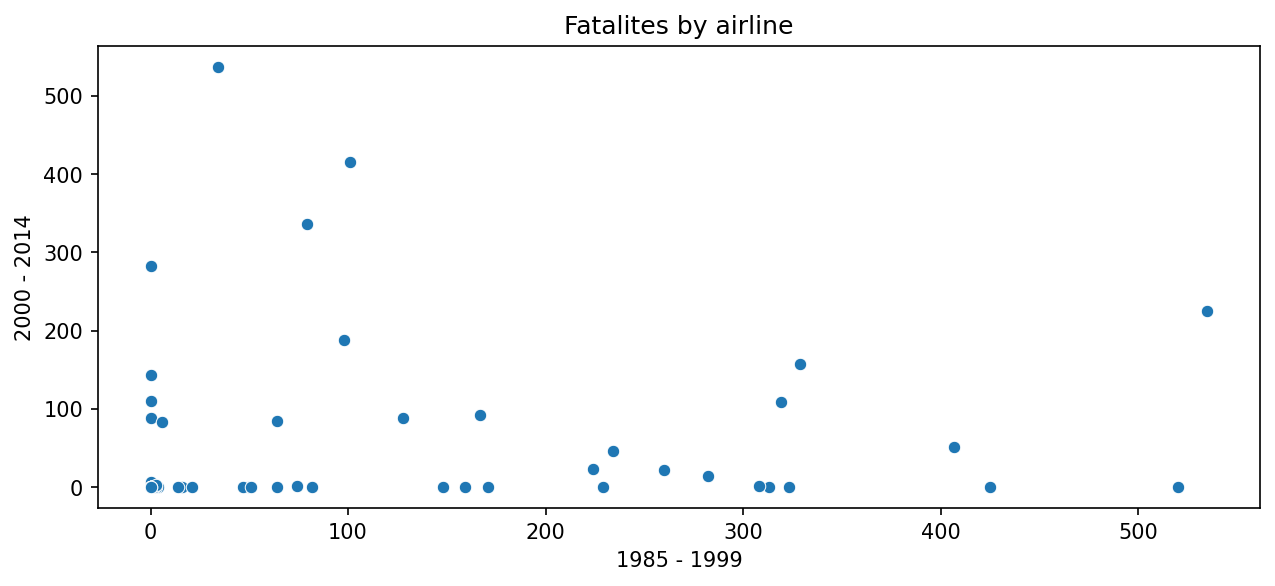

In [8]:
plt.figure(figsize = (10, 4), dpi = 150)
sns.scatterplot(data = flights, x = 'fatalities_85_99', y = 'fatalities_00_14')
plt.title('Fatalites by airline')
plt.xlabel('1985 - 1999')
plt.ylabel('2000 - 2014');

#### In this plot we can see that there is one company with high fatalite in the period 2000 - 2014. Also there is one company with high fatalite in 1985 - 2014 and middle fatalite in 2000 - 2014

#### these are the airlines

In [9]:
flights.nlargest(1, 'fatalities_00_14')

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
34,Malaysia Airlines,1039171244,3,1,34,3,2,537


In [10]:
flights.nlargest(1, 'fatalities_85_99')

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
16,China Airlines,813216487,12,6,535,2,1,225


#### Despite on these two cases ( let's call them exceptions) there is no correlation in the rate of fatalities from one period to the next.

#### Compare airlines on the basis of their number of incidents, whether or not they resulted in a fatality

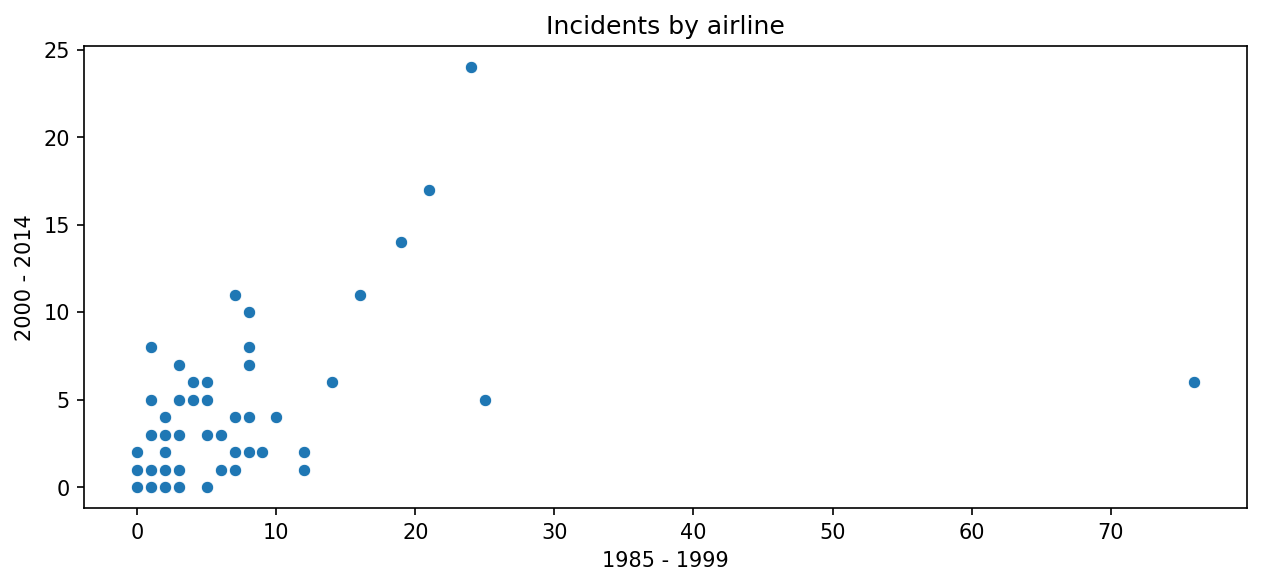

In [11]:
plt.figure(figsize = (10, 4), dpi = 150)
sns.scatterplot(data = flights, x = 'incidents_85_99', y = 'incidents_00_14')
plt.title('Incidents by airline')
plt.xlabel('1985 - 1999')
plt.ylabel('2000 - 2014');

#### There is little correlation between one period and another. This small positive correlation suggests that -  some airlines are safer than other. 
#### Also have four outliers. These airlines have had a persistently high rate of incidents 

In [12]:
flights[(flights['incidents_85_99'] > 20) | (flights['incidents_00_14'] > 20)]

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
1,Aeroflot*,1197672318,76,14,128,6,1,88
11,American*,5228357340,21,5,101,17,3,416
19,Delta / Northwest*,6525658894,24,12,407,24,2,51
22,Ethiopian Airlines,488560643,25,5,167,5,2,92


### We can draw primary conclusion: in order to understand the safety of an airline and to assume the liklihoof of future accidents, it is worth looking not at fatal cases, but at the total number of incidents of any kind. If incidents happen intermittently, then it can be assumed that the next incident could be fatal. 

### Dawn of airline safety

In [ ]:
# mean of columns: incidents_85_99 and incidents_00_14

In [13]:
mean_inc1 = np.round(flights['incidents_85_99'].mean(), 2)
mean_inc1

7.18

In [14]:
mean_inc2 = np.round(flights['incidents_00_14'].mean(), 2)
mean_inc2

4.12

In [15]:
# create new DataFrame 
safety = pd.DataFrame() 
safety['airline'] = flights['airline']

##### For each category, subtract an airline’s crash rate from the average for all airlines since 1985. This gives safer airlines positive scores and less safe airlines negative scores.

In [16]:
safety['85_99'] = flights['incidents_85_99'].apply(lambda inc1:mean_inc1 -inc1)

In [17]:
safety['00_14'] = flights['incidents_00_14'].apply(lambda inc2:mean_inc2 - inc2)

In [18]:
safety['kor_from_km'] = flights['avail_seat_km_per_week'].apply(lambda kor: sqrt(kor))

In [19]:
safety['1985_99'] = np.round(safety['85_99'] * safety['kor_from_km'],2)

In [20]:
safety['2000_14'] = np.round(safety['00_14'] * safety['kor_from_km'],2)

##### Standardize the score in each category to calculate how many standard deviations an airline is above or below the mean. Then average the scores from the three categories together.

In [21]:
safety['standart1'] = np.round((safety['1985_99'] - safety['1985_99'].mean()) / safety['1985_99'].std(), 2)

safety['standart2'] = np.round((safety['2000_14'] - safety['2000_14'].mean()) / safety['2000_14'].std(), 2)

In [22]:
safety = safety[['airline', 'standart1', 'standart2']]

In [32]:
safety['combined'] = np.round(((safety['standart1'] + safety['standart2']) / 2) ,2)
safety.head()

,airline,standart1,standart2,combined
15,Cathay Pacific*,0.93,0.54,0.74
28,Japan Airlines,0.48,0.74,0.61
41,Singapore Airlines,0.68,0.53,0.60
54,Virgin Atlantic,0.55,0.62,0.58
4,Air Canada,0.61,0.49,0.55


##### Column "combined" - this is the safety score


In [24]:
# sort descending

safety = safety.sort_values('combined', ascending=False)
safety

,airline,standart1,standart2,combined
15,Cathay Pacific*,0.93,0.54,0.74
28,Japan Airlines,0.48,0.74,0.61
41,Singapore Airlines,0.68,0.53,0.60
54,Virgin Atlantic,0.55,0.62,0.58
4,Air Canada,0.61,0.49,0.55
48,TAP - Air Portugal,0.51,0.52,0.52
32,LAN Airlines,0.40,0.62,0.51
23,Finnair,0.42,0.49,0.45
26,Hawaiian Airlines,0.47,0.41,0.44
42,South African,0.40,0.44,0.42


In [25]:
# create new DataFrame and add 5 safest companies and 5 most insecure companies
better_worst = pd.DataFrame()

In [26]:
# 5 safest companies

better_worst = safety.iloc[0:5]

In [27]:
# 5 most insecure companies

worst = safety.iloc[-6:-1]
better_worst = better_worst.append(worst)

/var/folders/49/kps2d09x1j75r1jvnzrp99bc0000gn/T/ipykernel_41960/3104502892.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  better_worst = better_worst.append(worst)


In [28]:
better_worst

,airline,standart1,standart2,combined
15,Cathay Pacific*,0.93,0.54,0.74
28,Japan Airlines,0.48,0.74,0.61
41,Singapore Airlines,0.68,0.53,0.60
54,Virgin Atlantic,0.55,0.62,0.58
4,Air Canada,0.61,0.49,0.55
5,Air France,-0.74,-0.19,-0.46
52,US Airways / America West*,-0.88,-1.02,-0.95
51,United / Continental*,-2.14,-2.73,-2.44
11,American*,-2.15,-3.07,-2.61
1,Aeroflot*,-5.26,-0.06,-2.66


In [29]:
# add to DataFrame information about index home country airlines and GDP per capita

In [30]:
better_worst['country'] = ['HK','JP','SG','UK','CA','FR','US','US','US','RU']
better_worst['vvp'] = ["25091", "36610", "21796","28726","22315", "24681", "34515", "34515", "34515", "1330"]
better_worst = better_worst[['airline','country','vvp','standart1','standart2','combined']]
better_worst.rename(columns = {'standart1':'1985-99', 'standart2':'2000-14'})
better_worst["vvp"] = pd.to_numeric(better_worst["vvp"])

,airline,country,vvp,1985-99,2000-14,combined
15,Cathay Pacific*,HK,25091,0.93,0.54,0.74
28,Japan Airlines,JP,36610,0.48,0.74,0.61
41,Singapore Airlines,SG,21796,0.68,0.53,0.60
54,Virgin Atlantic,UK,28726,0.55,0.62,0.58
4,Air Canada,CA,22315,0.61,0.49,0.55
5,Air France,FR,24681,-0.74,-0.19,-0.46
52,US Airways / America West*,US,34515,-0.88,-1.02,-0.95
51,United / Continental*,US,34515,-2.14,-2.73,-2.44
11,American*,US,34515,-2.15,-3.07,-2.61
1,Aeroflot*,RU,1330,-5.26,-0.06,-2.66


## Conclusions

### Looking at previous accident data, one cannot make an assumption about the safety of a company based on the number of fatal accidents or only on the total number of deaths. It would be better to pay attention to the level of incidents of any kind of airline.If a company has a consistently high accident rate, it's safe to say that that airline's flight safety is at risk. Also, you should pay attention to the GDP of the country where the airline is from. This will give an understanding of how the country has a high level of development and, accordingly, whether more attention is paid to the development of the aviation industry and security.For example, it is quite obvious that Ethiopian Airlines will have a much lower level of security than Hong Kong's Cathay Pacific (Ethiopian Airlines -0.34, Cathay Pacific +0.74)
### But don't avoid these airlines completely. The level of disasters is affected not only by the health of the aircraft itself, but also by the weather conditions and the area where the aircraft makes its flight (for example, flying over Nepal is much more dangerous than flying over a metropolis). You should only be afraid of those companies that have been blacklisted by, for example, the European Union (None of the airlines on the list above is currently on the EU’s blacklist, although one, Pakistan International Airlines, has been in the recent past).

